Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


<ipython-input-2-20e5bc920162>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


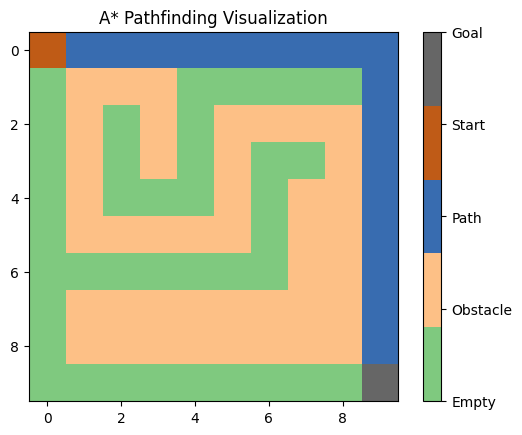

In [ ]:
import heapq

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

import matplotlib.pyplot as plt
import numpy as np

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Menandai titik awal
    grid[goal[0], goal[1]] = 4  # Menandai titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()

grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (9, 9)

path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")

# **TUGAS A:**

###**1. Jelaskan analisis anda dari contoh diatas:**

Kode ini menerapkan A (A-Star)* untuk mencari jalur terpendek dalam grid 2D dan menampilkannya menggunakan Matplotlib.

###**- Algoritma A* A* menentukan jalur terbaik dengan:**
- g(n): Biaya dari titik awal ke posisi saat ini.
- h(n): Perkiraan jarak ke tujuan (Manhattan Distance).
- f(n) = g(n) + h(n): Perhitungan total estimasi biaya.

###**- Implementasi:**
- Heap (Priority Queue) digunakan untuk memilih node dengan f(n) terendah.
- Tetangga (atas, bawah, kiri, kanan) dievaluasi sambil menghindari rintangan (1).
- g_score diperbarui jika ditemukan jalur yang lebih efisien.
- Jalur dikembalikan ketika goal tercapai.

###**- Visualisasi & Uji Coba:**

Jalur divisualisasikan pada grid 10x10, dengan kode warna:
- 0 = Kosong, 1 = Rintangan, 2 = Jalur, 3 = Titik Awal, 4 = Tujuan.

###**- Kesimpulan:**

- Efisien & Optimal dengan kompleksitas O(n log n).
- Visualisasi mempermudah pemahaman jalur.
- Tidak mendukung pergerakan diagonal atau bobot dinamis.

###**2. Buat studi kasus baru untuk heuristic search menggunakan A* lengkap dengan codingnya:**

###**(Studi Kasus: Navigasi Robot di Gudang Otomatis)**

Robot di gudang dengan banyak rintangan harus mencari jalur terpendek ke rak penyimpanan barang. Untuk itu, robot menggunakan algoritma A*, yang menggabungkan pencarian terdekat dan evaluasi heuristik. A* mempertimbangkan dua nilai: **G(n)** (biaya perjalanan dari titik awal) dan **H(n)** (estimasi jarak ke tujuan). Dengan menjumlahkan kedua nilai ini (F(n) = G(n) + H(n)), A* menentukan jalur optimal yang menghindari rintangan dan mencapai tujuan dengan biaya terendah.

```
import java.util.*;

class Node implements Comparable<Node> {
    int x, y, g, h;
    Node parent;
    
    public Node(int x, int y, int g, int h, Node parent) {
        this.x = x;
        this.y = y;
        this.g = g;
        this.h = h;
        this.parent = parent;
    }
    
    public int f() {
        return g + h;
    }
    
    @Override
    public int compareTo(Node other) {
        return Integer.compare(this.f(), other.f());
    }
}

public class AStarPathfinding {
    static int[][] grid = {
        {0, 0, 0, 0, 1},
        {1, 1, 0, 1, 0},
        {0, 0, 0, 0, 0},
        {0, 1, 1, 1, 0},
        {0, 0, 0, 0, 0}
    };
    static int rows = grid.length;
    static int cols = grid[0].length;
    static int[] dx = {-1, 1, 0, 0};
    static int[] dy = {0, 0, -1, 1};
    
    public static List<Node> aStar(int sx, int sy, int ex, int ey) {
        PriorityQueue<Node> openSet = new PriorityQueue<>();
        boolean[][] closedSet = new boolean[rows][cols];
        openSet.add(new Node(sx, sy, 0, heuristic(sx, sy, ex, ey), null));
        
        while (!openSet.isEmpty()) {
            Node current = openSet.poll();
            
            if (current.x == ex && current.y == ey) {
                return constructPath(current);
            }
            
            closedSet[current.x][current.y] = true;
            
            for (int i = 0; i < 4; i++) {
                int nx = current.x + dx[i];
                int ny = current.y + dy[i];
                
                if (isValid(nx, ny) && !closedSet[nx][ny]) {
                    int newG = current.g + 1;
                    openSet.add(new Node(nx, ny, newG, heuristic(nx, ny, ex, ey), current));
                }
            }
        }
        return null;
    }
    
    private static int heuristic(int x, int y, int ex, int ey) {
        return Math.abs(x - ex) + Math.abs(y - ey);
    }
    
    private static boolean isValid(int x, int y) {
        return x >= 0 && x < rows && y >= 0 && y < cols && grid[x][y] == 0;
    }
    
    private static List<Node> constructPath(Node node) {
        List<Node> path = new ArrayList<>();
        while (node != null) {
            path.add(node);
            node = node.parent;
        }
        Collections.reverse(path);
        return path;
    }
    
    public static void main(String[] args) {
        int startX = 0, startY = 0, endX = 4, endY = 4;
        List<Node> path = aStar(startX, startY, endX, endY);
        
        if (path != null) {
            System.out.println("Path ditemukan:");
            for (Node node : path) {
                System.out.println("(" + node.x + ", " + node.y + ")");
            }
        } else {
            System.out.println("Tidak ada jalur ditemukan.");
        }
    }
}
```

In [4]:
import random

# Fungsi objektif yang akan dimaksimalkan
def objective_function(x):
    # Contoh fungsi objektif: f(x) = -x^2 + 4x
    return -x**2 + 4*x

# Algoritma Hill Climbing
def hill_climbing():
    # Inisialisasi solusi secara acak
    current_solution = random.uniform(-10, 10)
    current_value = objective_function(current_solution)

    step_size = 0.1
    max_iterations = 1000

    for _ in range(max_iterations):
        # Buat tetangga solusi
        neighbors = [current_solution + step_size, current_solution - step_size]

        # Evaluasi tetangga
        next_solution = max(neighbors, key=objective_function)
        next_value = objective_function(next_solution)

        # Cek apakah solusi lebih baik
        if next_value > current_value:
            current_solution = next_solution
            current_value = next_value
        else:
            # Jika tidak ada solusi lebih baik, berhenti
            break

    return current_solution, current_value

# Contoh penggunaan
best_solution, best_value = hill_climbing()
print(f"Best solution: {best_solution}")
print(f"Best value: {best_value}")

Best solution: 1.9947066258259887
Best value: 3.999971980189854


#**TUGAS B:**

###**1. Jelaskan analisis anda dari contoh diatas:**

###**- Fungsi Objektif:**  
   - Fungsi yang dimaksimalkan adalah \( f(x) = -x^2 + 4x \), yaitu fungsi kuadratik berbentuk parabola terbalik.  
   - Fungsi ini memiliki **maksimum lokal** di \( x = 2 \) dengan nilai \( f(2) = 4 \).

###**- Inisialisasi Solusi:**  
   - Solusi awal dipilih secara acak dalam rentang \([-10, 10]\).  
   - Nilai fungsi objektif dihitung berdasarkan solusi awal.

###**- Mekanisme Hill Climbing:**  
   - Setiap iterasi, algoritma mengevaluasi dua tetangga dari solusi saat ini dengan **step size** sebesar 0.1.  
   - Tetangga yang memberikan nilai fungsi lebih tinggi dipilih sebagai solusi baru.  
   - Proses ini berlanjut hingga tidak ditemukan solusi yang lebih baik.

###**- Keunggulan:**  
   - **Cepat dan sederhana**: Algoritma ini mudah diterapkan dan konvergen dalam iterasi terbatas.  
   - **Efisien untuk fungsi sederhana**: Karena hanya mempertimbangkan nilai fungsi di sekitar solusi saat ini.

###**- Kelemahan:**  
- **Terjebak di maksimum lokal**: Jika fungsi memiliki banyak puncak, algoritma bisa berhenti sebelum mencapai optimum global.  
- **Tidak ada eksplorasi global**: Karena hanya bergerak ke solusi yang lebih baik, algoritma ini tidak memiliki mekanisme untuk keluar dari jebakan lokal.

###**- Kesimpulan:**  
   - Pada fungsi \( f(x) \) ini, **hill climbing akan selalu menemukan maksimum global di \( x = 2 \)**, **asalkan solusi awal berada di wilayah yang dapat mencapainya**.  
   - Jika solusi awal terlalu jauh dari maksimum dan berada di bagian monoton menurun, algoritma bisa gagal menemukan solusi optimal.  
   - Untuk mengatasi keterbatasan ini, teknik seperti **random restarts** atau **simulated annealing** dapat digunakan.

###**2. Buat studi kasus baru untuk heuristic search menggunakan Hill Climbing lengkap dengan codingnya:**

###**(Studi Kasus: Optimasi Jadwal Produksi Pabrik)**

Pabrik perlu mengoptimalkan jadwal untuk memaksimalkan waktu produksi dan mengurangi waktu idle mesin, dengan mempertimbangkan jumlah produk dan mesin yang ada. Algoritma Hill Climbing digunakan untuk mencari jadwal terbaik dengan mengubah urutan tugas mesin secara iteratif, mulai dari solusi acak. Proses ini dilakukan dengan mengevaluasi total waktu produksi dan idle mesin, kemudian memilih solusi yang lebih baik hingga tidak ada perbaikan lebih lanjut. Namun, algoritma ini dapat terjebak di solusi lokal dan tidak selalu menghasilkan solusi optimal global.

```
import random

def objective_function(x):
    return - (x - 50)**2 + 2500  # Fungsi keuntungan maksimum di x = 50

def hill_climbing():
    current_solution = random.randint(0, 100)  # Inisialisasi jumlah produksi secara acak
    current_value = objective_function(current_solution)

    step_size = 1
    max_iterations = 1000

    for _ in range(max_iterations):
        neighbors = [current_solution + step_size, current_solution - step_size]
        neighbors = [x for x in neighbors if 0 <= x <= 100]  # Batasi dalam rentang produksi
        
        next_solution = max(neighbors, key=objective_function)
        next_value = objective_function(next_solution)
        
        if next_value > current_value:
            current_solution = next_solution
            current_value = next_value
        else:
            break
    
    return current_solution, current_value

best_solution, best_value = hill_climbing()
print(f"Optimal produksi: {best_solution} unit")
print(f"Keuntungan maksimal: {best_value}")
```


Path from A to M: ['A', 'C', 'G', 'M']


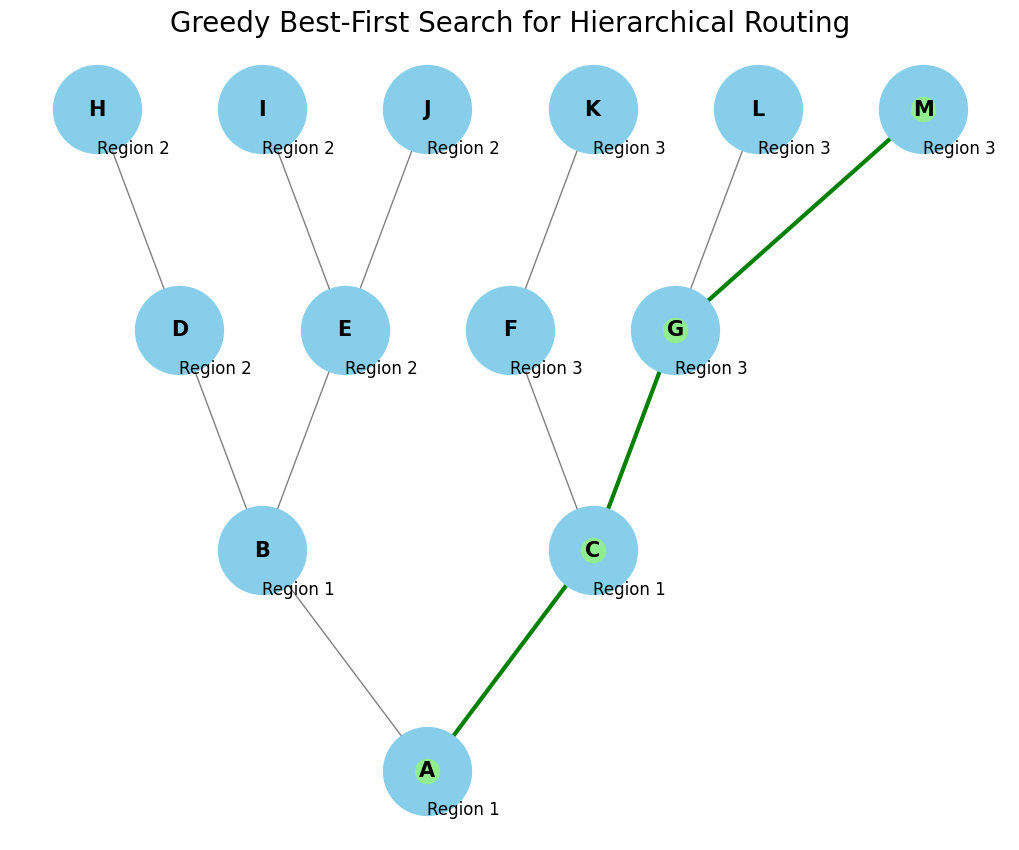

In [6]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, heuristic):  # Fixed constructor name
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):  # Fixed comparison method name
        return self.heuristic < other.heuristic


def greedy_best_first_search_hierarchical(graph, start, goal, heuristic, region_map):
    priority_queue = []  # Antrian prioritas berdasarkan nilai heuristik
    heapq.heappush(priority_queue, Node(start, heuristic[start]))  # Masukkan node awal

    visited = set()  # Menyimpan node yang sudah dikunjungi
    path = {start: None}  # Menyimpan jalur dari node yang dieksplorasi

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name  # Ambil node dengan heuristik terkecil

        if current_node == goal:  # Jika goal ditemukan, rekonstruksi jalur
            return reconstruct_path(path, start, goal)

        visited.add(current_node)  # Tandai node sebagai sudah dikunjungi

        # Eksplorasi tetangga dalam region yang sama
        current_region = region_map[current_node]
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] == current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

        # Eksplorasi tetangga di region lain
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] != current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None  # Jika tidak ditemukan jalur


def reconstruct_path(path, start, goal):
    current = goal
    result_path = []

    while current is not None:
        result_path.append(current)  # Tambahkan node ke jalur
        current = path[current]  # Pindah ke node induk

    result_path.reverse()  # Urutkan jalur agar dari start ke goal
    return result_path


def visualize_graph(graph, path, pos, region_map):
    G = nx.Graph()

    # Tambahkan edge ke graf
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(10, 8))  # Atur ukuran gambar

    # Gambar node dan edge
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue',
            font_size=15, font_weight='bold', edge_color='gray')

    # Sorot jalur hasil pencarian
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen')

    # Tambahkan informasi region pada graf
    for node, region in region_map.items():
        plt.text(pos[node][0], pos[node][1] - 0.2, f"Region {region}", fontsize=12, color='black')

    plt.title("Greedy Best-First Search for Hierarchical Routing", size=20)
    plt.show()


# Complex graph with hierarchical regions
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I', 'J'],
    'F': ['K'],
    'G': ['L', 'M'],
    'H': [],
    'I': [], 'J': [], 'K': [], 'L': [], 'M': []
}

# Heuristic values (assumed for this example)
heuristic = {
    'A': 8, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'F': 5, 'G': 4,
    'H': 3, 'I': 2, 'J': 2, 'K': 3, 'L': 2, 'M': 1
}

# Define regions for the hierarchical routing (nodes belonging to different regions)
region_map = {
    'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3, 'G': 3,
    'H': 2, 'I': 2, 'J': 2, 'K': 3, 'L': 3, 'M': 3
}


# Define positions for better visualization layout (can be modified)
pos = {
    'A': (0, 0), 'B': (-1, 1), 'C': (1, 1), 'D': (-1.5, 2),
    'E': (-0.5, 2), 'F': (0.5, 2), 'G': (1.5, 2), 'H': (-2, 3),
    'I': (-1, 3), 'J': (0, 3), 'K': (1, 3), 'L': (2, 3), 'M': (3, 3)
}

# Perform Greedy Best-First Search for hierarchical routing
start_node = 'A'
goal_node = 'M'
result_path = greedy_best_first_search_hierarchical(graph, start_node, goal_node, heuristic, region_map)

print("Path from {} to {}: {}".format(start_node, goal_node, result_path))

# Visualize the graph and the found path
visualize_graph(graph, result_path, pos, region_map)

#**TUGAS C:**

###**1. Jelaskan analisis anda dari contoh diatas:**

Contoh di atas menunjukkan penerapan algoritma *Greedy Best-First Search* untuk *Hierarchical Routing* pada graf berjenjang.

###**- Algoritma:**   
- Memilih jalur berdasarkan *heuristic value* terendah yang memperkirakan jarak ke tujuan.
- Kriteria yang digunakan adalah heuristic function yang memperkirakan seberapa dekat simpul dengan tujuan.

###**- Struktur Graf:**   
- Node (simpul) diwakili oleh lingkaran biru dengan label huruf (A, B, C, dll.).
- Terdapat tiga region:
 - Region 1 (A, B, C)
 - Region 2 (D, E, H, I, J)
 - Region 3 (F, G, K, L, M)
- Garis hitam menunjukkan semua koneksi antar simpul, sedangkan garis hijau menunjukkan jalur optimal yang dipilih oleh algoritma.

###**- Cara Kerja:**   
- Algoritma memilih jalur dengan heuristic value terendah.
- Dari A, algoritma memilih C karena mendekati tujuan.
- Dari C, algoritma memilih G (simpul yang paling dekat dengan tujuan di region 3).
- Selanjutnya, algoritma memilih M sebagai tujuan akhir.

###**- Keunggulan:**   
- Algoritma ini cepat karena hanya mengeksplorasi jalur yang paling menjanjikan.
- Mengurangi jumlah simpul yang dieksplorasi.

###**- Kekurangan:**   
- Bisa terjebak pada local optimum tanpa menemukan solusi terbaik.
- Tidak menjamin solusi optimal karena hanya mempertimbangkan jarak terpendek pada setiap langkah tanpa memperhatikan biaya keseluruhan.

###**- Kesimpulan:**  
Algoritma ini cocok untuk routing jaringan, tetapi sebaiknya dikombinasikan dengan algoritma lain seperti *A* untuk hasil optimal.

###**2. Buat studi kasus pelacakan baru yang bisa diselesaikan dengan metode Greedy BFS**

####**(Kasus: Navigasi Robot dalam Labirin untuk Mencari Pintu Keluar)**

Sebuah robot otonom berada di dalam labirin yang berbentuk kotak dengan beberapa rintangan di dalamnya. Robot tersebut harus mencari jalan keluar dari labirin dengan menggunakan metode **Greedy Best First Search (Greedy BFS)**.

### **Deskripsi Kasus:**
- Robot mulai dari posisi awal (Start Point) di koordinat `(0, 0)` dalam grid 2D.
- Tujuan (Goal) berada di koordinat `(4, 4)`.
- Labirin berisi beberapa dinding yang tidak bisa dilewati.
- Robot hanya bisa bergerak ke **atas, bawah, kiri,** atau **kanan**.
- Robot tidak diperbolehkan bergerak secara diagonal.

### **Representasi Grid:**
| 0 | 1 | 2 | 3 | 4 |
|---|---|---|---|---|
| S | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 | 0 |
| 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | G |

###**Keterangan:**
- `S`: Posisi awal robot
- `G`: Posisi tujuan
- `1`: Dinding yang tidak bisa dilewati
- `0`: Jalur yang bisa dilewati

### **Cara Kerja Metode Greedy BFS**
Metode **Greedy BFS** akan selalu memilih node berikutnya berdasarkan **jarak heuristik** paling pendek ke tujuan tanpa memperhatikan biaya lintasan sebelumnya.

Heuristik yang digunakan adalah:
\[
h(n) = |x_{goal} - x_{current}| + |y_{goal} - y_{current}|
\]

Dimana:
- \( x_{goal}, y_{goal} \) = Koordinat tujuan `(4, 4)`
- \( x_{current}, y_{current} \) = Koordinat posisi saat ini

###**Proses Penyelesaian:**

###**Langkah-langkah:**
1. Mulai dari `(0, 0)` → Heuristik = 8
2. Pilih tetangga dengan nilai heuristik terkecil:
   - `(0, 1)` → h(7)
   - `(1, 0)` → h(7) ✅ (Dipilih)
3. Dari `(1, 0)`:
   - `(2, 0)` → h(6) ✅ (Dipilih)
4. Dari `(2, 0)`:
   - `(2, 1)` → h(5) ✅ (Dipilih)
5. Dari `(2, 1)`:
   - `(2, 2)` → h(4) ✅ (Dipilih)
6. Dari `(2, 2)`:
   - `(3, 2)` → h(3) ✅ (Dipilih)
7. Dari `(3, 2)`:
   - `(3, 3)` → h(2) ✅ (Dipilih)
8. Dari `(3, 3)`:
   - `(4, 3)` → h(1) ✅ (Dipilih)
9. Dari `(4, 3)`:
   - `(4, 4)` → h(0) (Tujuan ditemukan 🎯)

### **Keunggulan Greedy BFS:**
✅ Cepat dalam menemukan solusi  
✅ Cocok untuk pencarian pada lingkungan besar  

### **Kelemahan:**
❌ Tidak selalu menemukan solusi optimal  
❌ Rentan terhadap jebakan (terkadang memilih jalur buntu)  

### **Kesimpulan:**
Metode **Greedy BFS** sangat efektif dalam menyelesaikan masalah pencarian seperti labirin, terutama jika waktu menjadi prioritas dibandingkan jarak optimal. Namun, metode ini tidak menjamin jalur yang paling pendek.

###**3.	Jelaskan perbedaan cara kerja BFS dan Greedy BFS:**
  

| Aspek               | BFS (Breadth First Search)       | Greedy BFS (Greedy Best First Search)     |
|-------------------|--------------------------------|------------------------------------------|
| **Prinsip Kerja**  | Mengeksplorasi semua node pada satu level sebelum melanjutkan ke level lebih dalam (**pencarian melebar**). | Memilih node dengan **nilai heuristik terkecil** menuju tujuan tanpa mempertimbangkan jalur sebelumnya. |
| **Kriteria Pemilihan Node** | Berdasarkan **kedalaman** (level) node dari akar ke tujuan. | Berdasarkan **fungsi heuristik** yang memperkirakan jarak node ke tujuan. |
| **Optimalitas**  | Selalu menemukan solusi **terpendek** jika ada. | Tidak selalu menemukan solusi terpendek karena hanya mempertimbangkan jarak heuristik. |
| **Kecepatan**  | Lebih lambat, terutama pada ruang pencarian besar. | Lebih cepat, tetapi bisa terjebak pada jalur yang salah atau buntu. |
| **Penggunaan Heuristik** | **Tidak menggunakan** heuristik (pencarian buta). | **Menggunakan** heuristik sebagai perkiraan jarak ke tujuan. |
| **Kompleksitas Waktu** | **Lebih tinggi**, terutama pada struktur data besar. | **Lebih rendah**, tetapi tidak menjamin solusi optimal. |
| **Cocok Digunakan Untuk** | Pencarian solusi **terbaik** dan **terpendek**, seperti dalam pencarian rute atau pohon keputusan. | Pencarian solusi yang **cepat** di ruang pencarian besar, seperti dalam navigasi atau AI game. |


### **Kesimpulan:**  
**- BFS** menjamin menemukan jalur **terpendek**, tetapi lebih lambat karena mengeksplorasi semua kemungkinan secara sistematis.  
**- Greedy BFS** lebih cepat karena hanya mempertimbangkan **jarak heuristik** ke tujuan, tetapi tidak selalu memberikan solusi optimal.